In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as catboost
import seaborn as sns
import lightgbm as lgbm
# Input data files are available in the read-only "../input/" directoryfrom sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,log_loss, f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

/kaggle/input/instagram-reach/instagram_reach.csv


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


In [3]:
#importing data
df = pd.read_csv('/kaggle/input/instagram-reach/instagram_reach.csv')

In [4]:
#Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
# import pandas as pd
# from ydata_profiling import ProfileReport

# # Generate the report
# profile = ProfileReport(df, title="Profiling Report")

# # Save the report to an HTML file
# profile.to_file("report.html")

# profile

In [8]:
#removing Nan columns
df = df.dropna()

In [9]:
"""unnamed and sno ko drop krege 
timeposted= num and object ko alag karna hai
hashtags me sabko # isse alag karna hai fir one 
hot encoding krege ki konsa word jyada aane se likes jyada hoga
"""

'unnamed and sno ko drop krege \ntimeposted= num and object ko alag karna hai\nhashtags me sabko # isse alag karna hai fir one \nhot encoding krege ki konsa word jyada aane se likes jyada hoga\n'

In [10]:
df = df.drop(['Unnamed: 0','S.No'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [12]:
df['HourSincePosted'] = df['Time since posted'].str.extract('(\d+)').astype(int)


In [13]:
df = df.drop(['Time since posted'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   USERNAME         94 non-null     object
 1   Caption          94 non-null     object
 2   Followers        94 non-null     int64 
 3   Hashtags         94 non-null     object
 4   Likes            94 non-null     int64 
 5   HourSincePosted  94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


In [15]:
# Assuming df is your DataFrame with the 'hashtags' column
df['Hashtags'] = df['Hashtags'].astype(str)  # Convert to string to handle any potential NaN values

# Extract all hashtags using regular expression
hashtags_series = df['Hashtags'].str.findall(r'#\w+')

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for hashtags_list in hashtags_series.dropna() for hashtag in hashtags_list]
hashtags_count = pd.Series(all_hashtags).value_counts()

# Display the most used hashtags
print(hashtags_count.head())


#artificialintelligence    29
#machinelearning           25
#blockchain                17
#startup                   15
#AI                        15
Name: count, dtype: int64


In [16]:
df['Hashtags'] = df['Hashtags'].astype(str)  # Convert to string to handle any potential NaN values

# Count the number of '#' in each row and create a new column 'Hashtag_count'
df['Hashtag_count'] = df['Hashtags'].apply(lambda x: x.count('#'))

# Display the result
print(df[['Hashtags', 'Hashtag_count']])


                                             Hashtags  Hashtag_count
0   #MachineLearning #AI #DataAnalytics #DataScien...              5
1    #deck .#mac #macintosh#sayhello #apple #steve...             28
2   #whoiswho #aitrading #ai #aitradingteam#instat...             30
3   #iot #cre#workplace #CDO #bigdata #technology#...             30
4   #instamachinelearning #instabigdata#instamarke...             26
..                                                ...            ...
95  #beverlyhills #realestate#losangelesrealestate...             15
96  #workspace #work #developer#development #devel...             28
97  #books #book #motivation #inspiration #life#bo...             29
98  #heavyequipment #underconstruction#dozer #real...             30
99  #marketing #programming#development #desarroll...             30

[94 rows x 2 columns]


In [17]:
df.shape

(94, 7)

In [18]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Likes,HourSincePosted,Hashtag_count
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11,5
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2,28
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2,30
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3,30
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3,26


In [19]:
#finding num_column and cat_column
num_columns = df.select_dtypes(include=['number']).columns
cat_columns = df.select_dtypes(exclude=['number']).columns

In [20]:
num_columns

Index(['Followers', 'Likes', 'HourSincePosted', 'Hashtag_count'], dtype='object')

In [21]:
cat_columns

Index(['USERNAME', 'Caption', 'Hashtags'], dtype='object')

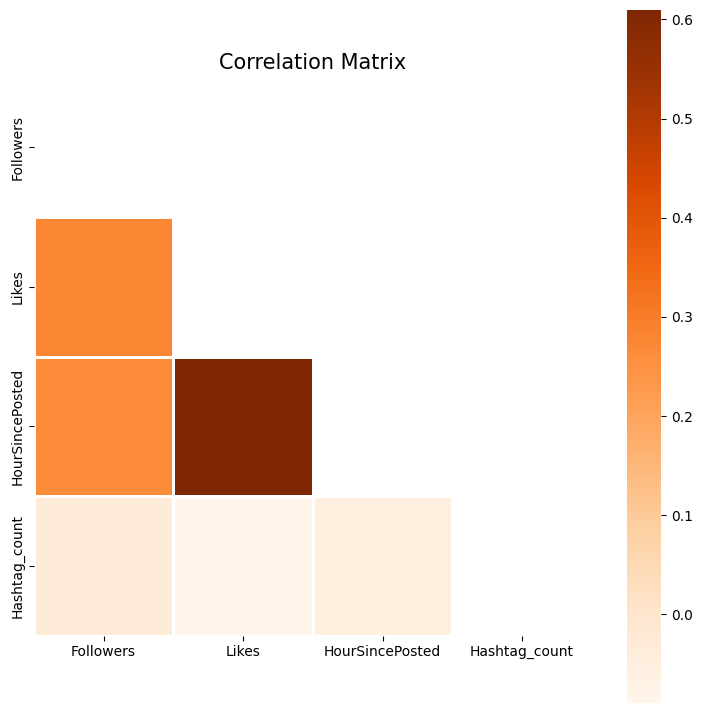

In [22]:
corr_matrix = df[num_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='Oranges', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9})
plt.title('Correlation Matrix', fontsize=15)
plt.show()


In [23]:
df.Caption

0     Who are #DataScientist and what do they do? >>...
1     We all know where it’s going. We just have to ...
2     Alexander Barinov: 4 years as CFO in multinati...
3                                                  sfad
4     Ever missed a call while your phone was chargi...
                            ...                        
95    328 S. Wetherly Drive, Beverly Hills, CA 90212...
96    Credit @tristankappel To find more dvlp follow...
97    We are coming up with the Best 21 Books that w...
98    We’re only paid to move dirt once. It’s not ju...
99                      Obtén tu tienda en línea ahora.
Name: Caption, Length: 94, dtype: object

In [24]:
#determining x and y
X=df.drop(['Likes','Hashtags'],axis=1)
y=df['Likes']

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 80 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   USERNAME         75 non-null     object
 1   Caption          75 non-null     object
 2   Followers        75 non-null     int64 
 3   HourSincePosted  75 non-null     int64 
 4   Hashtag_count    75 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


In [27]:
#importing metrics of performance
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
#defining metric evaluation model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
#model building
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression

In [30]:
#defining multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'LogisticRegression':LogisticRegression()
}

In [31]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [32]:
# def preprocessing(df, le_cols, ohe_cols):
#     # Reset index before exploding lists
#     df = df.reset_index(drop=True)

#     # Label Encoding for binary cols
#     le = LabelEncoder()
#     for col in le_cols:
#         df[col] = le.fit_transform(df[col])

#     # OneHot Encoding for category cols
#     for col in ohe_cols:
#         # Flatten lists if present
#         if df[col].apply(type).eq(list).any():
#             df[col] = df[col].explode()

#         df = pd.get_dummies(df, columns=[col])

#     # Other preprocessing steps...

#     return df

# # delete this
# df= preprocessing(df, le_cols=[], ohe_cols=["USERNAME", "Caption"])


In [33]:
from sklearn.preprocessing import LabelEncoder

def preprocessing(df, le_cols, ohe_cols, max_ohe_columns=5):
    # Reset index before exploding lists
    df = df.reset_index(drop=True)

    # Label Encoding for binary cols
    le = LabelEncoder()
    for col in le_cols:
        df[col] = le.fit_transform(df[col])

    # OneHot Encoding for category cols
    for col in ohe_cols:
        # Flatten lists if present
        if df[col].apply(type).eq(list).any():
            df[col] = df[col].explode()

        # Perform one-hot encoding with limited columns
        unique_values = df[col].nunique()
        if unique_values > max_ohe_columns:
            top_values = df[col].value_counts().nlargest(max_ohe_columns).index
            df = pd.get_dummies(df, columns=[col], prefix=col, prefix_sep='_').filter(like=f'{col}_').rename(columns=lambda x: col + '_' + str(x) if x in top_values else col + '_other')
        else:
            df = pd.get_dummies(df, columns=[col], prefix=col, prefix_sep='_')

    # Other preprocessing steps...

    return df

# Example usage:
df = preprocessing(df, le_cols=[], ohe_cols=["USERNAME", "Caption"], max_ohe_columns=5)


KeyError: 'Caption'

In [ ]:
df.describe

In [ ]:


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    #this is a validation(test) score
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


In [ ]:
#more complex models
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


import lightgbm as lgbm

In [ ]:
train_data = lgbm.Dataset(X_train, label=y_train)
test_data = lgbm.Dataset(X_test, label=y_test, reference=train_data)


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse', 
    'boosting_type': 'gbdt',
    'num_leaves': 31,  
    'learning_rate': 0.05, 
    'feature_fraction': 0.9, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 5, 
    'verbose': 0 
}


In [ ]:
# For regression
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM dataset objects
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set hyperparameters
params = {
    'objective': 'regression',
    'metric': 'rmse',  # 'rmse' for regression problems
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'early_stopping_rounds': 10  # specify early stopping rounds here
}

# Train the model
num_round = 100
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")
